In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset1 = pd.read_csv('2015.csv')
dataset2 = pd.read_csv('2016.csv')
dataset3 = pd.read_csv('2017.csv')

In [4]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
dataset1.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
dataset1.columns = [each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in dataset1.columns]
dataset2.columns = [each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in dataset2.columns]
dataset3.columns = [each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in dataset3.columns]

In [7]:
 dataset1.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
region_lists = list(dataset1['Region'].unique())
region_happiness_ratio = []
for i in region_lists:
 region = dataset1[dataset1["Region"]==i]
 region_happiness_rate = sum(region.Happiness_Score/len(region))
 region_happiness_ratio.append(region_happiness_rate)
data = pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index = (data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
sorted_data.head()

,region,region_happiness_ratio
2,Australia and New Zealand,7.285000
1,North America,7.273000
0,Western Europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167


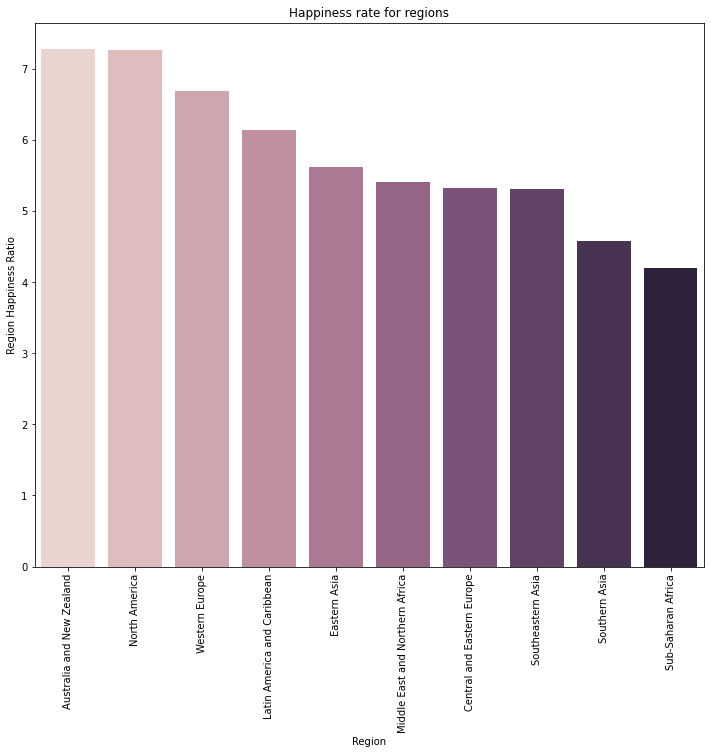

In [9]:
#---------- BAR PLOT -------------------------
plt.figure(figsize=(12,10))
sns.barplot(x=sorted_data['region'], y=sorted_data['region_happiness_ratio'],palette=sns.cubehelix_palette(len(sorted_data['region'])))
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Happiness rate for regions')
plt.show()

In [10]:
region_lists = list(dataset1['Region'].unique())
region_economy_ratio = []
for i in region_lists:
 region = dataset1[dataset1["Region"]==i]
 region_economy_rate = sum(region.Economy/len(region))
 region_economy_ratio.append(region_economy_rate)
data_economy = pd.DataFrame({'region':region_lists,'region_economy_ratio':region_economy_ratio})
new_index = (data_economy['region_economy_ratio'].sort_values(ascending=True)).index.values
sorted_data_economy = data_economy.reindex(new_index)
sorted_data_economy.head()

,region,region_economy_ratio
8,Sub-Saharan Africa,0.380473
9,Southern Asia,0.560486
5,Southeastern Asia,0.789054
4,Latin America and Caribbean,0.876815
6,Central and Eastern Europe,0.942438


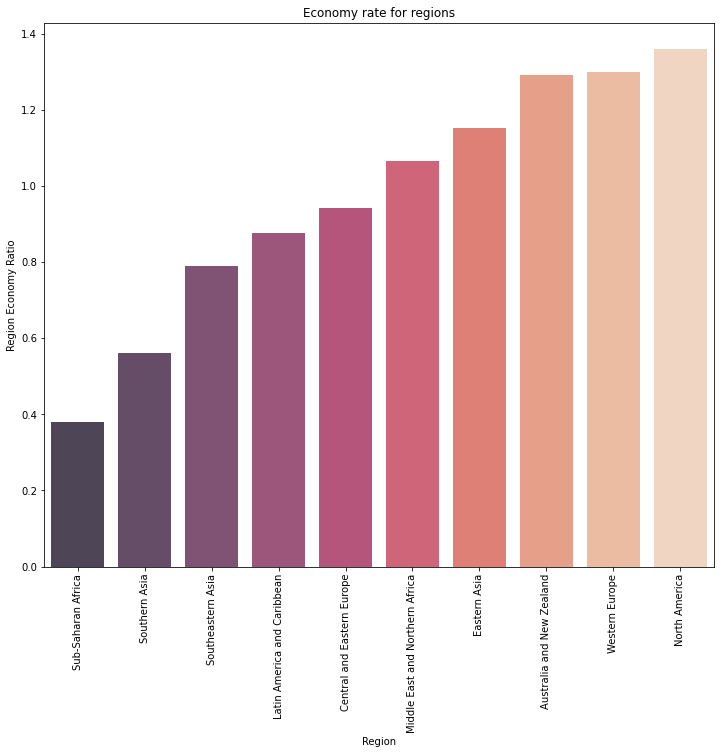

In [11]:
plt.figure(figsize=(12,10))
sns.barplot(x=sorted_data_economy['region'],y=sorted_data_economy['region_economy_ratio'],palette="rocket",alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Region Economy Ratio')
plt.title('Economy rate for regions')
plt.show()

C:\Users\chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


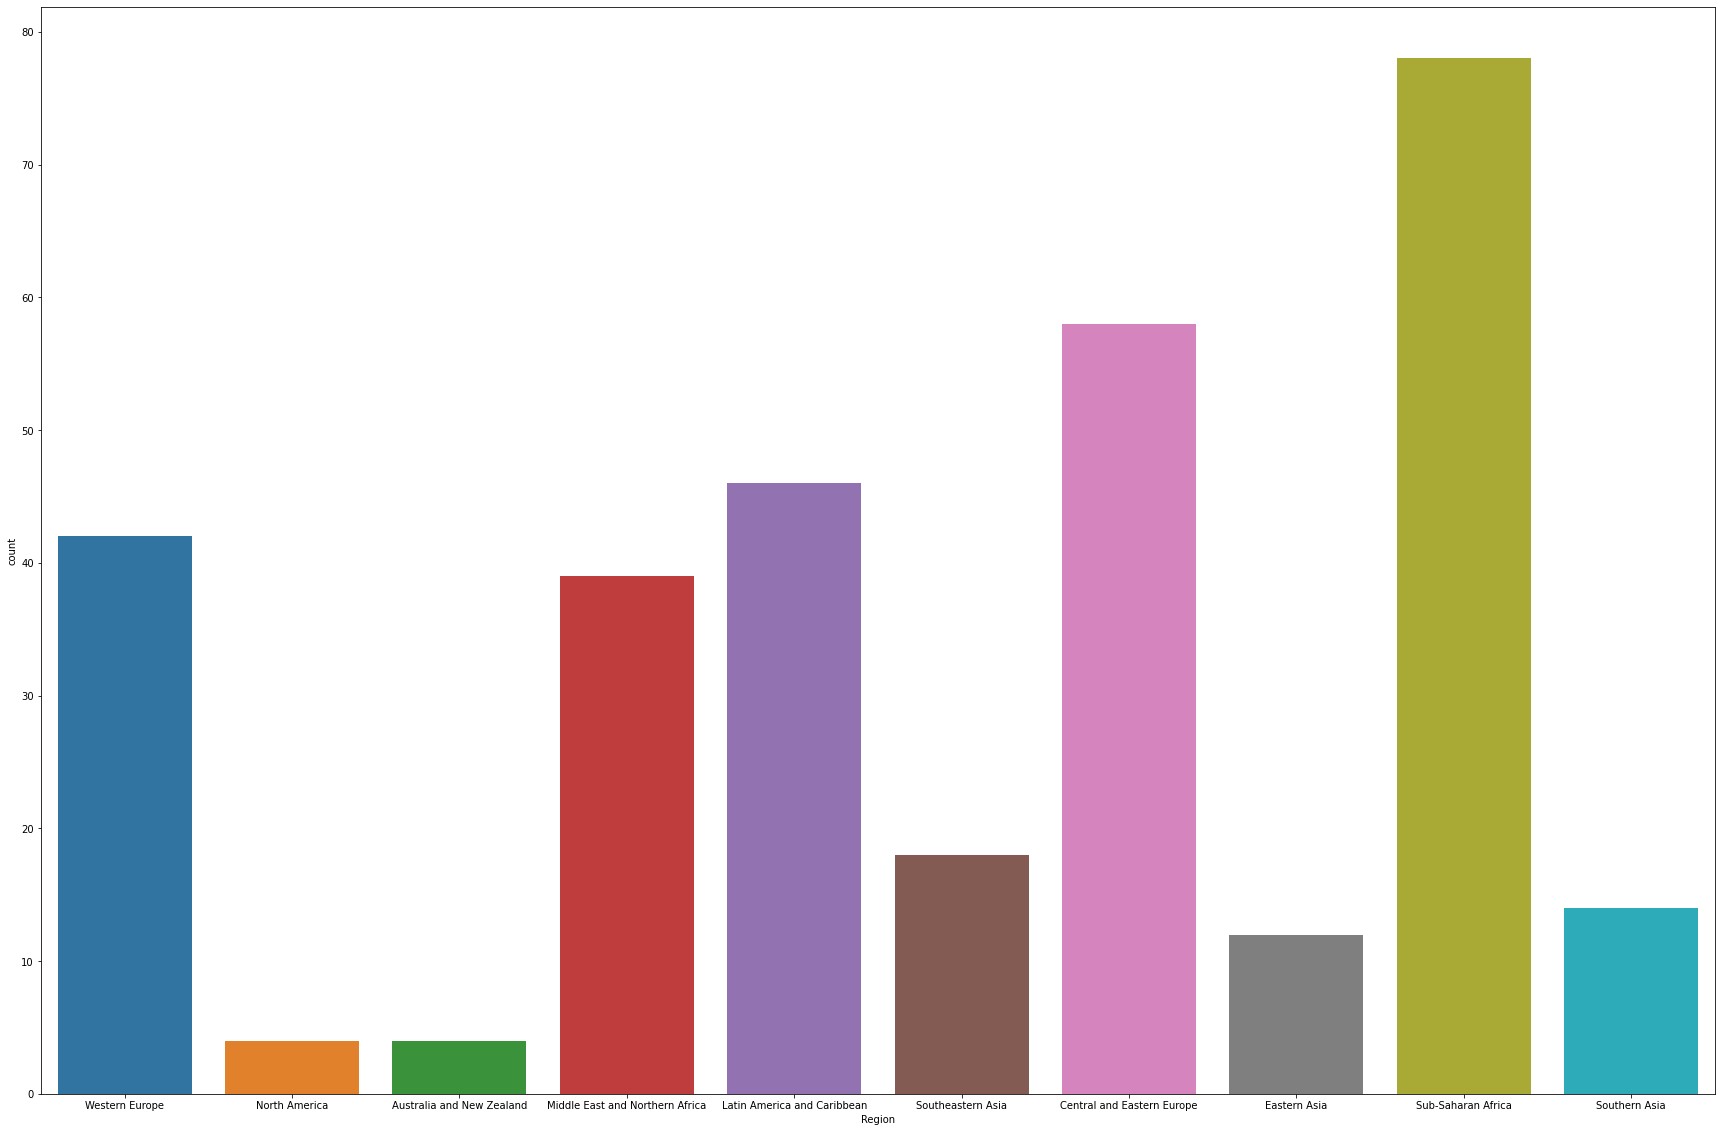

In [12]:
#------------------ COUNT PLOT ----------------------------------
dataset1['Year']=2015
dataset2['Year']=2016
dataset3['Year']=2017
data_concat= pd.concat([dataset1,dataset2,dataset3],axis=0,sort=False)
f,ax=plt.subplots(figsize=(30,20))
sns.countplot(data_concat.Region,ax=ax)
plt.show()

C:\Users\chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


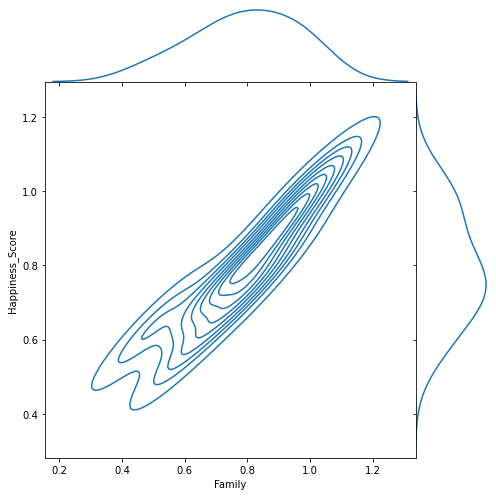

In [13]:
# -------------- JOINT PLOT ------------------------
dataframe = pd.pivot_table(dataset1,index='Region',values=["Happiness_Score","Family"])
dataframe["Happiness_Score"]=dataframe["Happiness_Score"]/max(dataframe["Happiness_Score"])
dataframe["Family"]=dataframe["Family"]/max(dataframe["Family"])
sns.jointplot(dataframe.Family,dataframe.Happiness_Score,kind="kde",height=7,space=0)
plt.show()

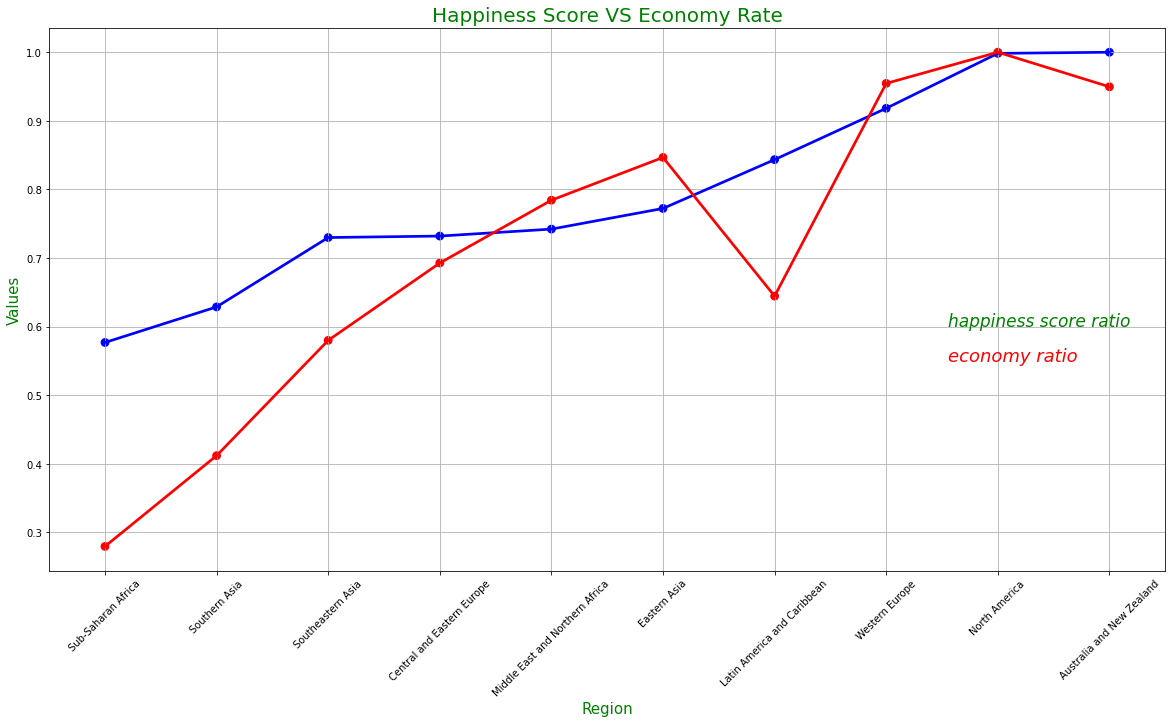

In [14]:
# ---------------------- POINT PLOT--------------------------------
sorted_data['region_happiness_ratio']=sorted_data['region_happiness_ratio']/max(sorted_data['region_happiness_ratio'])
sorted_data_economy['region_economy_ratio']=sorted_data_economy['region_economy_ratio']/max(sorted_data_economy['region_economy_ratio'])
data=pd.concat([sorted_data,sorted_data_economy['region_economy_ratio']],axis=1)
data.sort_values('region_happiness_ratio',inplace=True)
f,ax=plt.subplots(figsize=(20,10))
sns.pointplot(x='region',y='region_happiness_ratio',data=data,color='blue',alpha=0.8)
sns.pointplot(x='region',y='region_economy_ratio',data=data,color='red',alpha=0.8)
plt.text(7.55,0.6,'happiness score ratio',color='green',fontsize=17,style='italic')
plt.text(7.55,0.55,'economy ratio',color='red',fontsize=18,style='italic')
plt.xticks(rotation=45)
plt.xlabel('Region', fontsize=15,color='green')
plt.ylabel('Values',fontsize=15,color='green')
plt.title('Happiness Score VS Economy Rate',fontsize=20,color='green')
plt.grid()
plt.show()

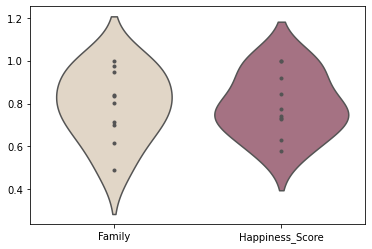

In [15]:
#------------------------------- VIOLIN PLOT --------------------------
dataframe1=pd.pivot_table(dataset1,index="Region",values=["Happiness_Score","Trust"])
dataframe1["Happiness_Score"]=dataframe1["Happiness_Score"]/max(dataframe1["Happiness_Score"])
dataframe1["Trust"]=dataframe1["Trust"]/max(dataframe1["Trust"])
pal=sns.cubehelix_palette(2,rot=.5,dark=.5)
sns.violinplot(data=dataframe,palette=pal,inner="points")
plt.show()

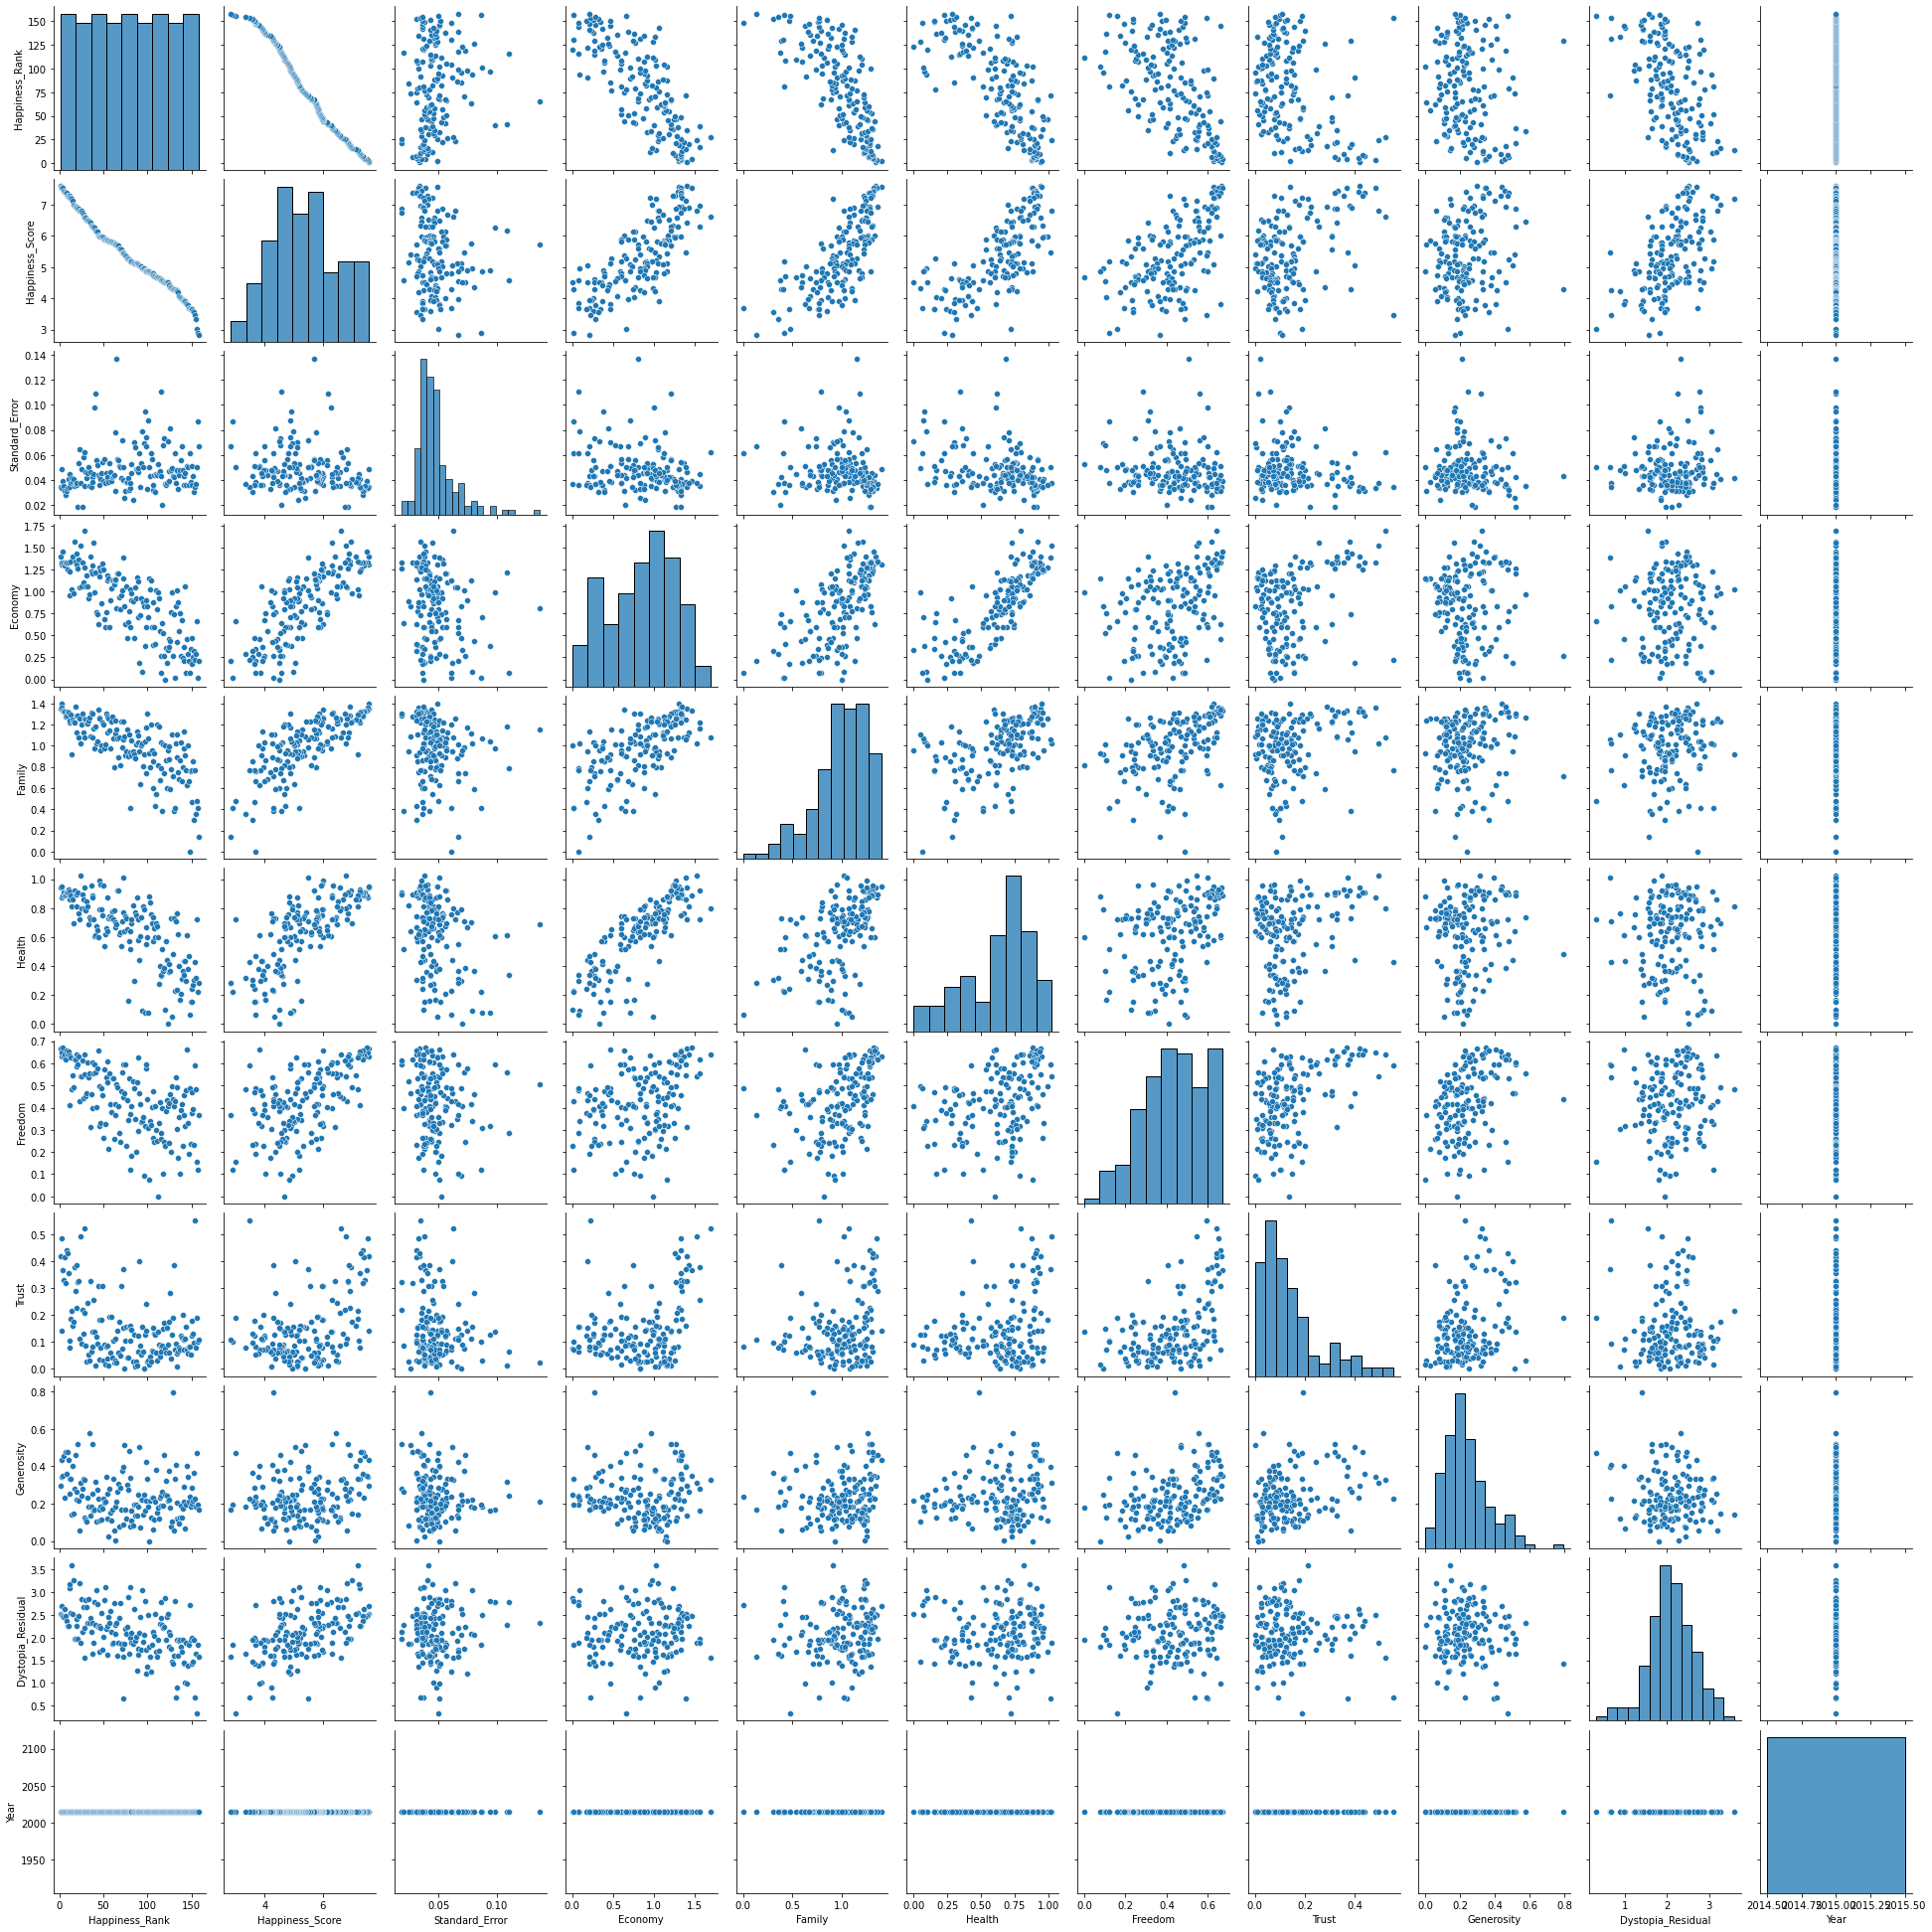

In [17]:
# ------------------------------ PAIR PLOT -------------------
sns.pairplot(dataset1)
plt.show()